In [188]:
import numpy
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [166]:
sample = pd.read_csv('car.csv')
sample

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [140]:
sample_array = np.sort(sample.values, axis=0)
sorted_sample = pd.DataFrame(sample_array, columns=sample.columns)
sorted_sample

,Car,Model,Volume,Weight,CO2
0,Audi,1,900,790,90
1,Audi,216,1000,865,90
2,Audi,3,1000,929,92
3,BMW,5,1000,929,94
4,BMW,500,1000,980,94
5,BMW,A-Class,1100,990,95
6,Fiat,A1,1200,1109,95
7,Ford,A4,1300,1112,97
8,Ford,A6,1400,1112,97
9,Ford,Astra,1500,1119,98


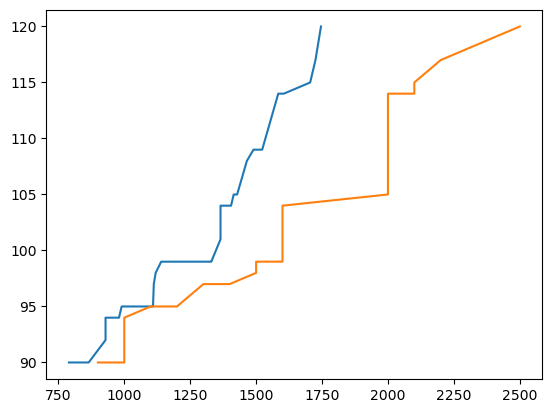

In [159]:
sorted_X = sorted_sample[['Weight', 'Volume']]
sorted_y = sorted_sample['CO2']

plt.plot(sorted_X, sorted_y)

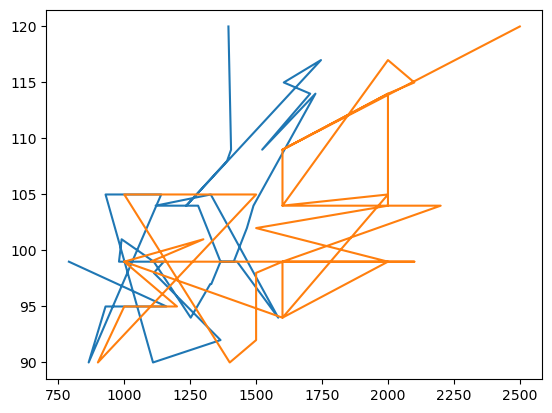

In [158]:
X = sample[['Weight', 'Volume']]
y = sample['CO2']

plt.plot(X, y)

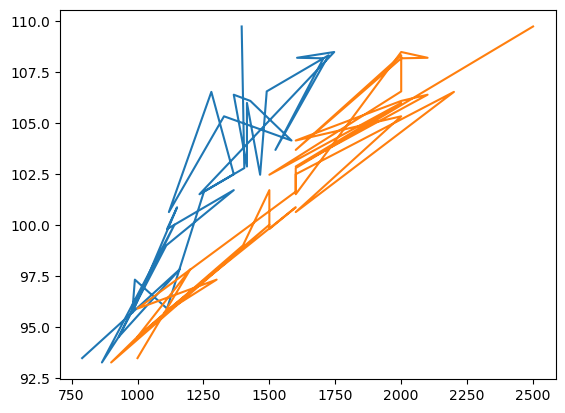

In [162]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

plt.plot(X, lin_reg.predict(X))

In [169]:
predicted_co2 = lin_reg.predict([[2300,1300]])
predicted_co2

/home/parmida/miniconda3/envs/baldr/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([121.61228702])

In [171]:
# These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.
# And if the engine size (Volume) increases by 1cm3, the CO2 emission increases by 0.00780526g.
lin_reg.coef_

array([0.02112143, 0.00546437])

In [172]:
# example 2

In [178]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

# training set
train_x = x[:80]
train_y = y[:80]

# test set
test_x = x[80:]
test_y = y[80:]

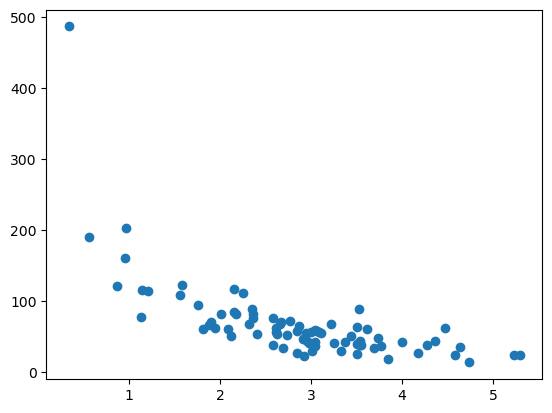

In [179]:
# check data
plt.scatter(train_x, train_y)

In [180]:
# fit data in a polynomial model
poly_model = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))
poly_model

poly1d([   5.62327976,  -73.68149545,  345.24244335, -698.88706342,
        581.89094244])

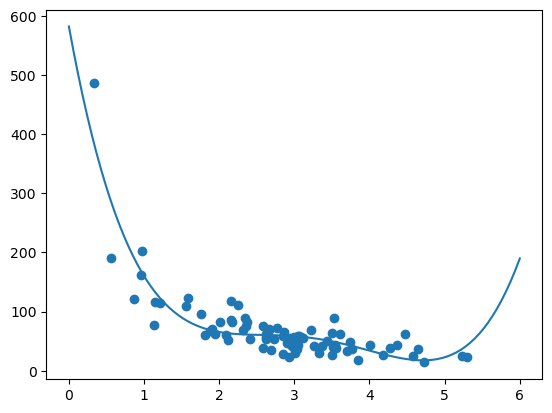

In [186]:
# check if model fits the data on plot
line = numpy.linspace(0, 6, 100)
plt.scatter(train_x, train_y)
plt.plot(line, poly_model(line))

In [192]:
# use R2 to evaluate how good our model performs
r2 = r2_score(train_y, poly_model(train_x))
# it is good by about 80 percent
r2

0.7988645544629798

In [194]:
# use test set this time
r2_test = r2_score(test_y, poly_model(test_x))
# it did well on test set as well
r2_test

0.8086921460343658

In [195]:
poly_model(5)

np.float64(22.879625918122656)